In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# hyperparameters tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# XGBoost
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [5]:
# see rows, columns
train.shape

(614, 13)

In [3]:
# see statistical summary
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Univariate Analysis

In [6]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [6]:
train['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

### Cateogorical Variables (Nominal)

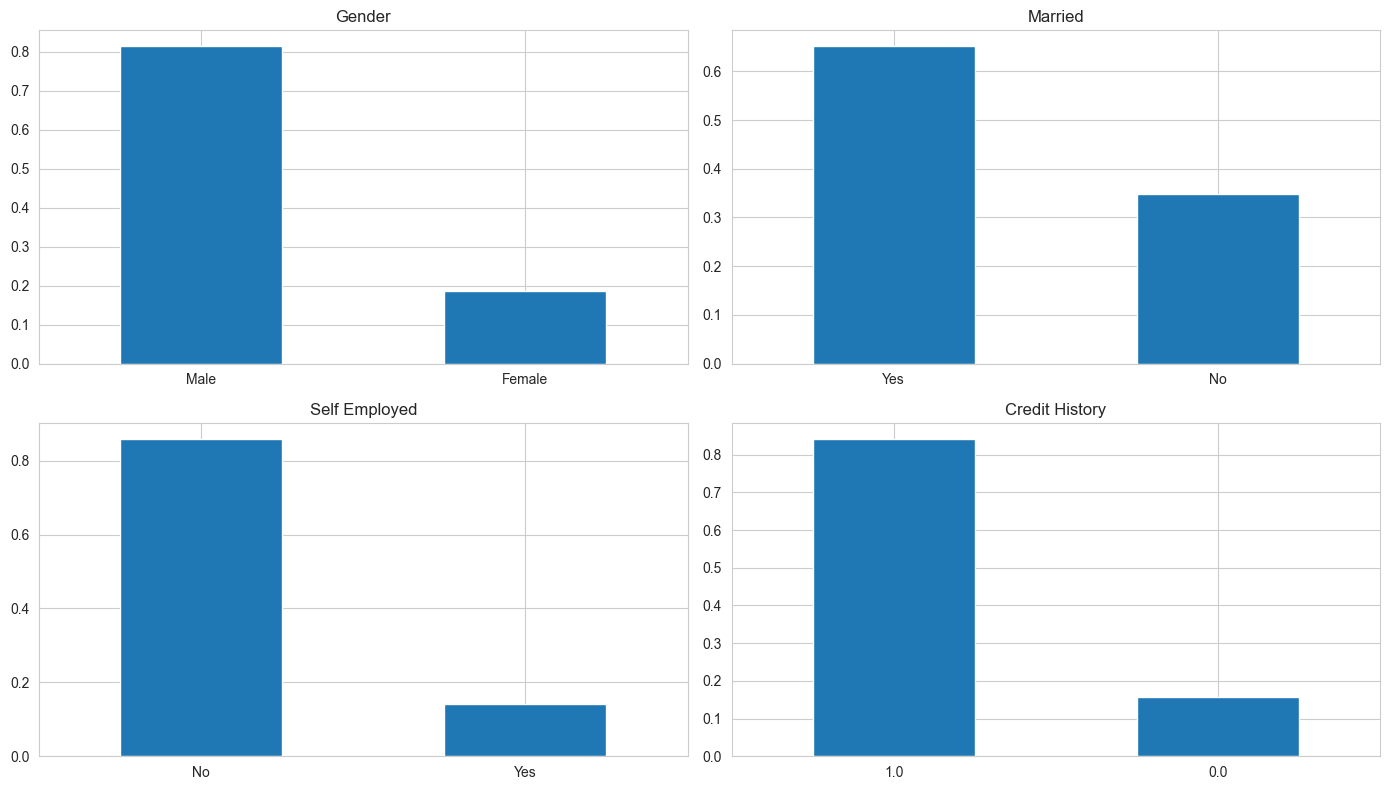

In [7]:
plt.figure(1, layout='tight')
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title="Gender", rot=0)

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title="Married", rot=0)

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Self Employed', rot=0)

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Credit History', rot=0)
plt.show()

### Inference:
Categorical variables are pretty imbalanced based on the above charts

### Ordinal variable

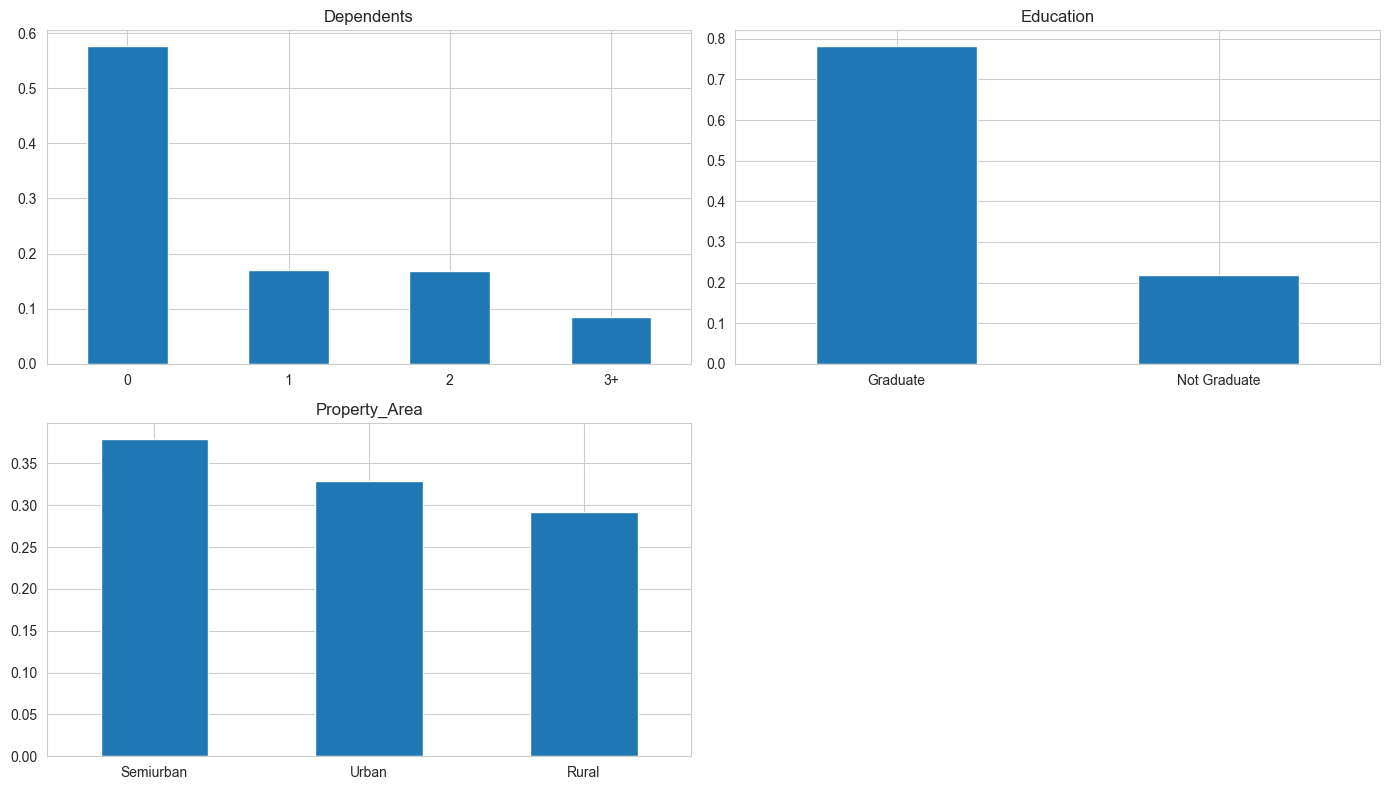

In [14]:
plt.figure(1, layout='tight')
plt.subplot(221)
train['Dependents'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Dependents', rot=0)

plt.subplot(222)
train['Education'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Education', rot=0)

plt.subplot(223)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Property_Area', rot=0)

plt.show()

### Numerical variable

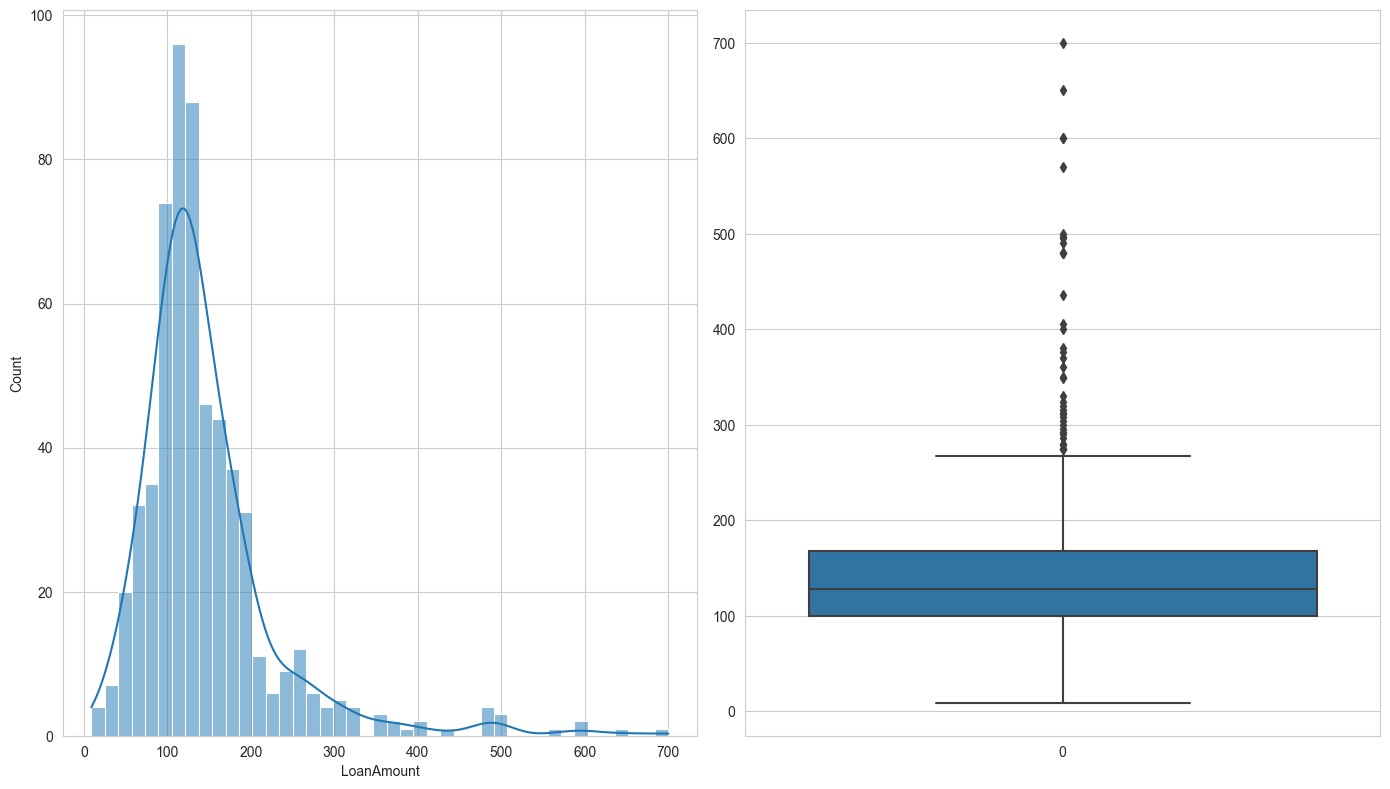

In [39]:
plt.figure(1, layout='tight', figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.histplot(train['LoanAmount'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(train['LoanAmount'])
plt.show()

### Bivariate Analysis

In [40]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender = Gender.div(Gender.sum(1).astype('float32'), axis=0)

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married = Married.div(Married.sum(1).astype('float32'), axis=0)

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents = Dependents.div(Dependents.sum(1).astype('float32'), axis=0)

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education = Education.div(Education.sum(1).astype('float32'), axis=0)

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed = Self_Employed.div(Self_Employed.sum(1).astype('float32'), axis=0)

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History = Credit_History.div(Credit_History.sum(1).astype('float32'), axis=0)

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area = Property_Area.div(Property_Area.sum(1).astype('float32'), axis=0)

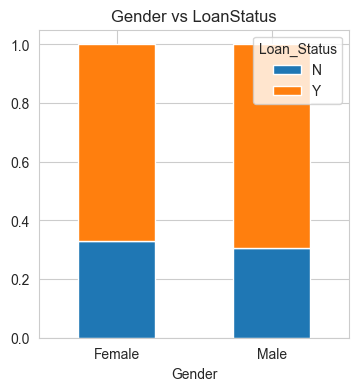

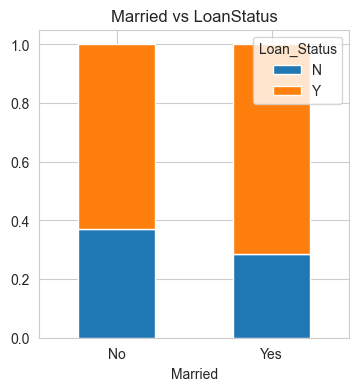

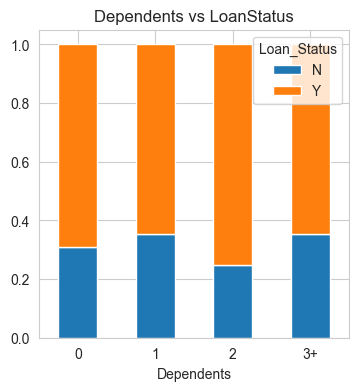

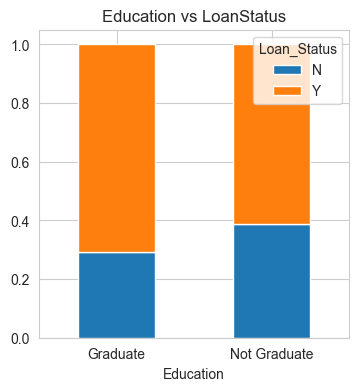

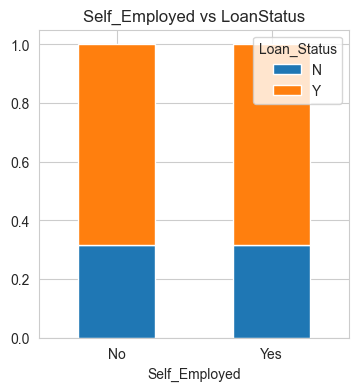

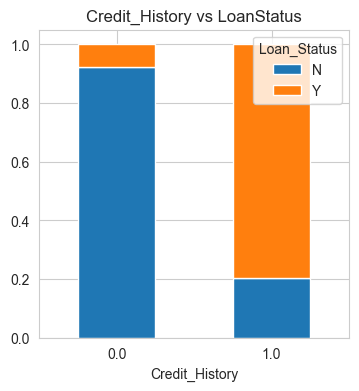

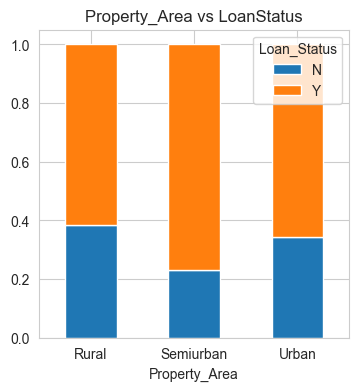

In [9]:
Gender.plot(kind='bar', figsize=(4, 4), stacked=True, title="Gender vs LoanStatus", rot=0)

Married.plot(kind='bar', figsize=(4, 4), stacked=True, title="Married vs LoanStatus", rot=0)

Dependents.plot(kind='bar', figsize=(4, 4), stacked=True, title="Dependents vs LoanStatus", rot=0)

Education.plot(kind='bar', figsize=(4, 4), stacked=True, title="Education vs LoanStatus", rot=0)

Self_Employed.plot(kind='bar', figsize=(4, 4), stacked=True, title="Self_Employed vs LoanStatus", rot=0)

Credit_History.plot(kind='bar', figsize=(4, 4), stacked=True, title="Credit_History vs LoanStatus", rot=0)

Property_Area.plot(kind='bar', figsize=(4, 4), stacked=True, title="Property_Area vs LoanStatus", rot=0)

plt.show()

In [10]:
train['ApplicantIncome'].quantile(q=[0, 0.25, 0.5, 0.75])

0.00     150.0
0.25    2877.5
0.50    3812.5
0.75    5795.0
Name: ApplicantIncome, dtype: float64

In [11]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_Bin'] = pd.cut(train['ApplicantIncome'], bins=bins, labels=group)

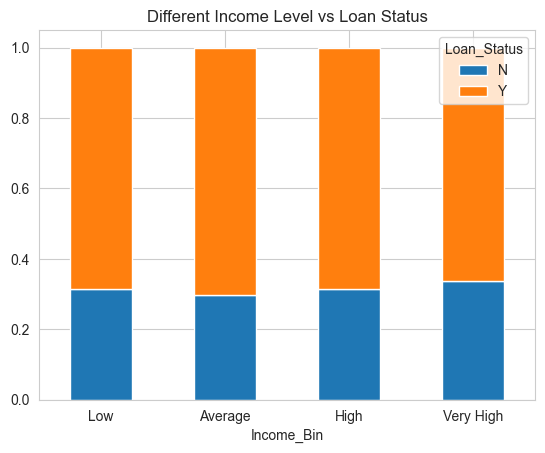

In [12]:
Income_Bin = pd.crosstab(train['Income_Bin'], train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1), axis=0).plot.bar(stacked=True, title="Different Income Level vs Loan Status", rot=0)
plt.show()

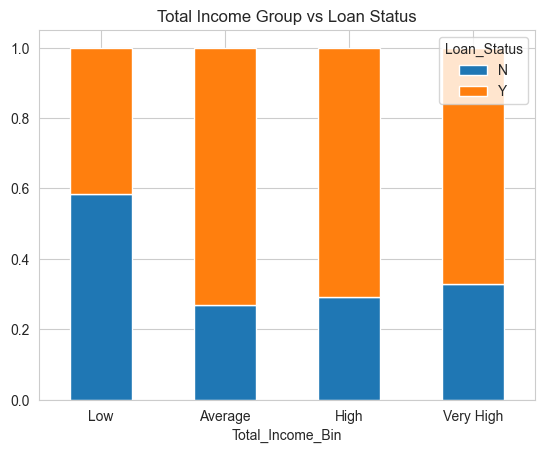

In [13]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train['Total_Income_Bin'] = pd.cut(train['Total_Income'], bins=bins, labels=group)
Total_Income_Bin = pd.crosstab(train['Total_Income_Bin'], train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1), axis=0).plot.bar(stacked=True, title="Total Income Group vs Loan Status", rot=0)
plt.show()

In [14]:
train = train.drop(['Income_Bin', 'Total_Income_Bin', 'Total_Income'], axis=1)

In [15]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace({ 'Y': 1, 'N': 0 }, inplace=True)

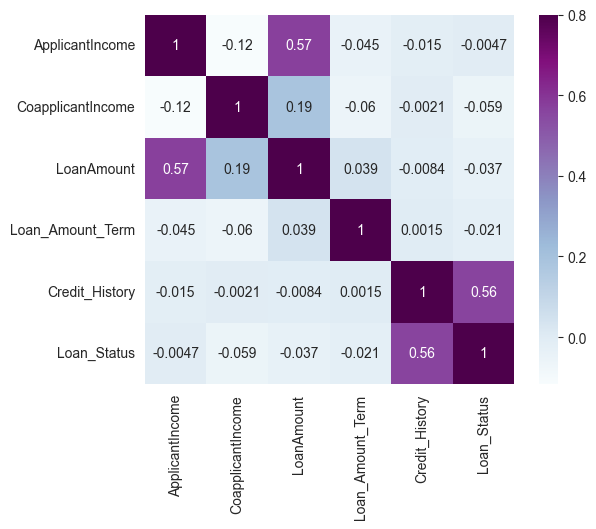

In [17]:
matrix = train.corr(numeric_only=True)
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)
plt.show()

Based on the confusion matrix, there are strong positive correlation between the `ApplicantIncome` and `LoanAmount`. Besides, there is also strong positive correlation between the `Credit_History` and `Credit_History`.

### Preprocessing Data

In [125]:
# all missing values count
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
# replaces instances without Gender with 'Male' as it's majority
train['Gender'] = train['Gender'].fillna('Male')
test['Gender'] = test['Gender'].fillna('Male')

# replaces instances without Married with 'Yes' as it's majority
train['Married'] = train['Married'].fillna('Yes')
test['Married'] = test['Married'].fillna('Yes')

# replaces instances without Dependents with 0 as it's majority
train['Dependents'] = train['Dependents'].fillna('0')
test['Dependents'] = test['Dependents'].fillna('0')

# replaces instances without Self_Employed with 'No' as it's majority
train['Self_Employed'] = train['Self_Employed'].fillna('No')
test['Self_Employed'] = test['Self_Employed'].fillna('No')

# replaces missing Loan_Amount with median
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

# replaces missing Loan_Amount_Term with mode
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(360)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(360)

# replaces instances with mode
train['Credit_History'] = train['Credit_History'].fillna(1)
test['Credit_History'] = test['Credit_History'].fillna(1)

In [19]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

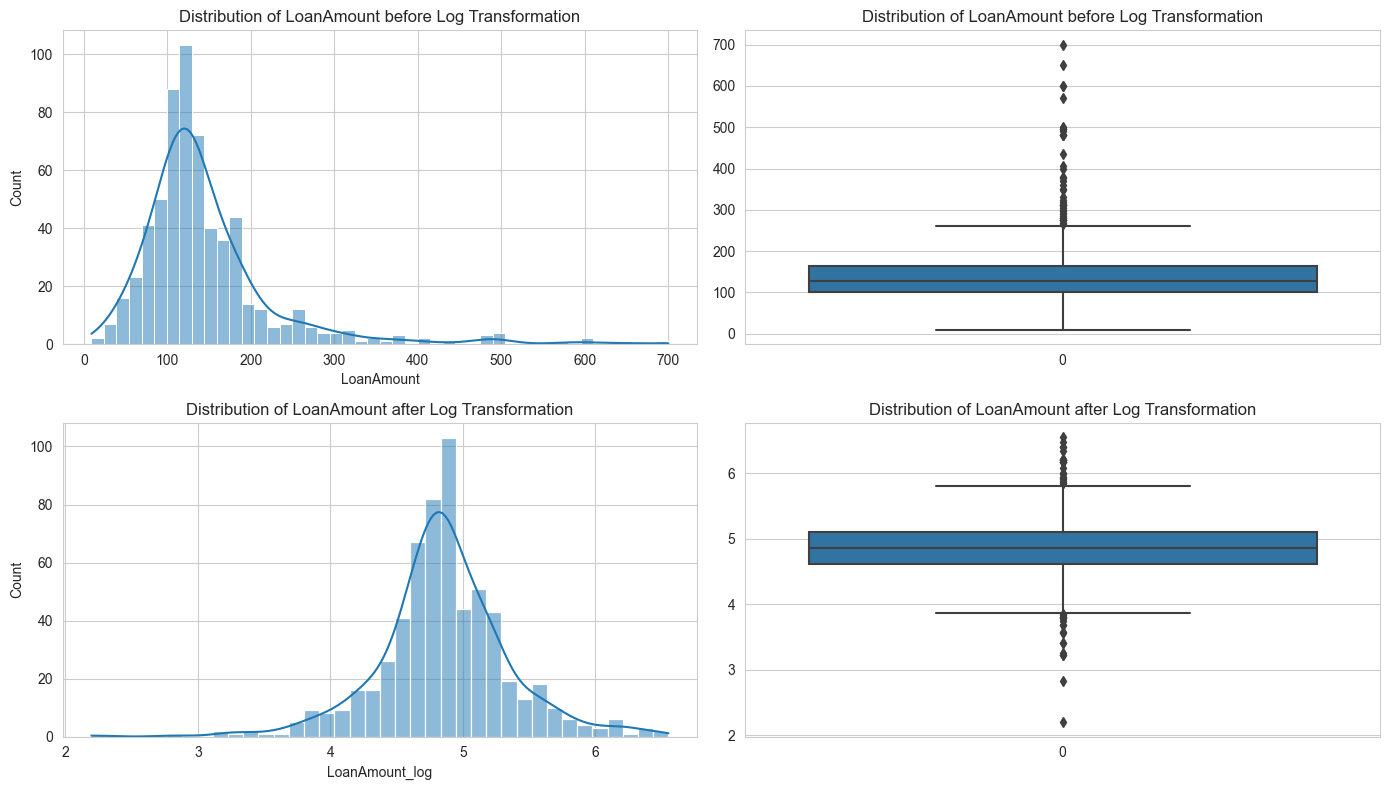

In [20]:
plt.figure(figsize=(14, 8), layout='tight')

plt.subplot(221)
plt.title("Distribution of LoanAmount before Log Transformation")
sns.histplot(train['LoanAmount'], kde=True)

plt.subplot(222)
plt.title("Distribution of LoanAmount before Log Transformation")
sns.boxplot(train['LoanAmount'])

plt.subplot(223)
plt.title("Distribution of LoanAmount after Log Transformation")
sns.histplot(train['LoanAmount_log'], kde=True)

plt.subplot(224)
plt.title("Distribution of LoanAmount after Log Transformation")
sns.boxplot(train['LoanAmount_log'])
plt.show()

### Some feature engineering

In [21]:
# total income by summing up the income of applicant and co-applicant
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# loan amount required to pay every month
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

# balance income after paying EMI
train['Balance_Income'] = train['ApplicantIncome'] - train['EMI']
test['Balance_Income'] = test['ApplicantIncome'] - test['EMI']

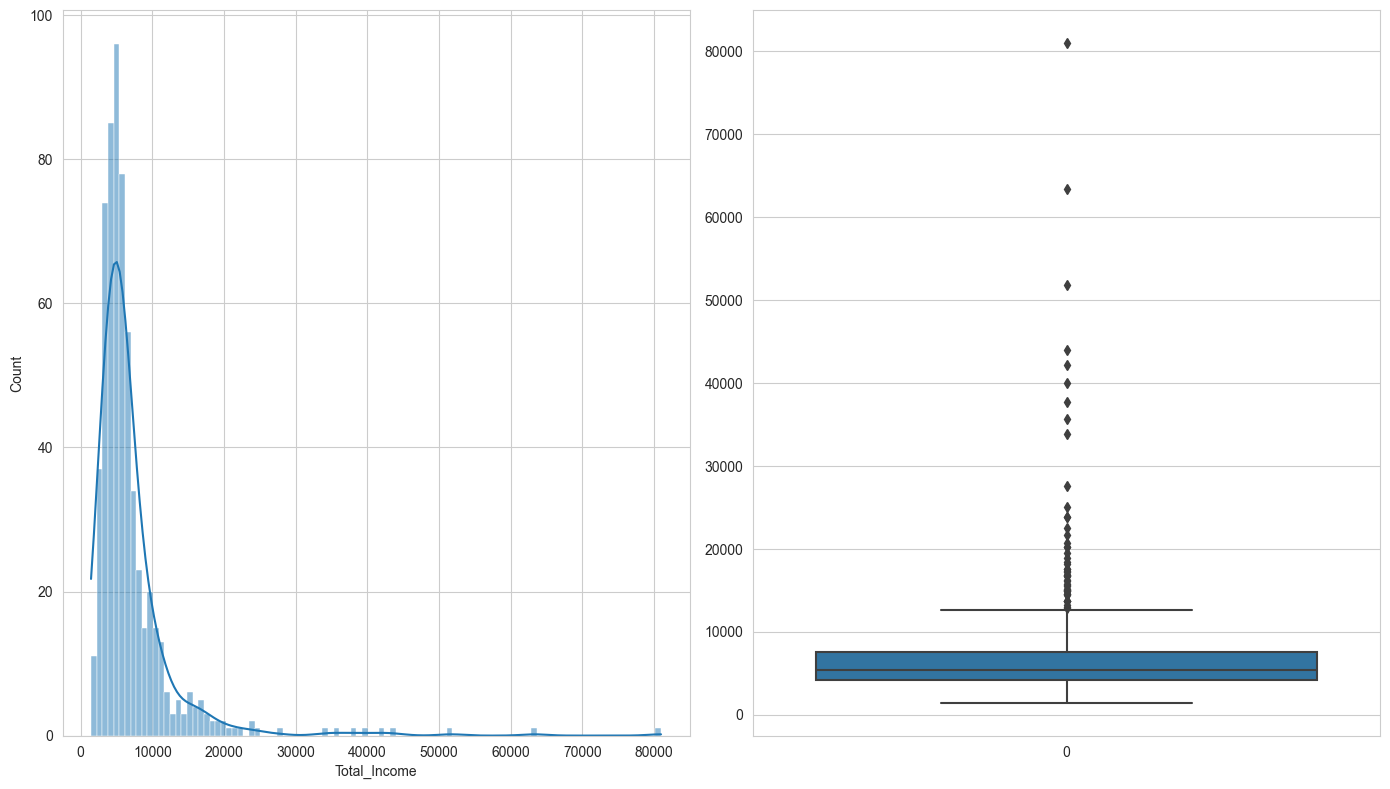

In [22]:
plt.figure(figsize=(14, 8), layout='tight')

plt.subplot(121)
sns.histplot(train['Total_Income'], kde=True)

plt.subplot(122)
sns.boxplot(train['Total_Income'])

plt.show()

In [201]:
# LoanAmmount, ApplicantIncome, LoanStatus, CreditHistory
# feature selection

selected_features = train[['LoanAmount_log', 'Total_Income', 'EMI', 'Credit_History']]
selected_labels = train['Loan_Status']

selected_features = pd.get_dummies(selected_features)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(selected_features)

In [202]:
# partitioning dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, selected_labels, test_size=0.2, random_state=42)

In [203]:
def plot_confusion_heatmap(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_pred, y_test).ravel()
    
    labels = [
        f'True Negative\n{true_negative}',
        f'False Positive\n{false_positive}',
        f'False Negative\n{false_negative}',
        f'True Positive\n{true_positive}'
    ]
    labels = np.array(labels).reshape(2, 2)
    
    plt.title("Confusion Matrix")
    sns.heatmap(cm, cmap="BuPu", annot=labels, fmt="")
    plt.xlabel("Predicted Values")
    plt.ylabel("Ground Truth")
    plt.show()

In [204]:
# grid search for hyperparameter tuning
def grid_search(model, param_grid):
    # fold the data into how many split
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X_train, y_train)
    print("Best: %f using %s " % (grid_result.best_score_, grid_result.best_params_))
    
    # summarize result
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f), with %r" % (mean, stdev, param))

In [205]:
lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7804878048780488

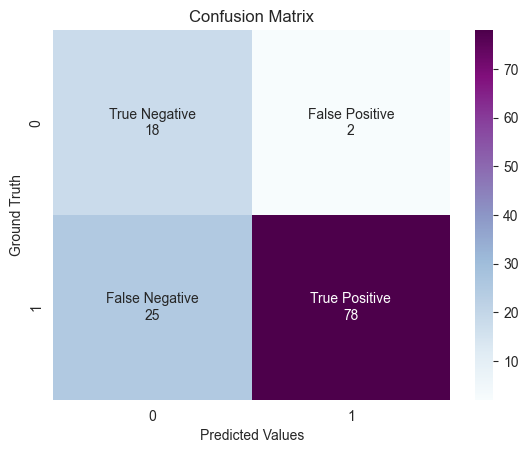

In [206]:
plot_confusion_heatmap(y_pred, y_test)

### Hyperparameter tuning for Logistic Regression

In [207]:
# Hyperparameter tuning
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1, 0.1, 0.01]
grid_search(lg_model, dict(solver=solvers, penalty=penalty, C=c_values))

Best: 0.812639 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'} 
0.811279 (0.034659), with {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.811279 (0.034659), with {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.811279 (0.034659), with {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.811279 (0.034659), with {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.811279 (0.034659), with {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.811279 (0.034659), with {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.811279 (0.034659), with {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.811279 (0.034659), with {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.811279 (0.034659), with {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.811959 (0.034147), with {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.811959 (0.034147), with {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.811279 (0.034659), with {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.812639 (0.034024), with {

In [208]:
# re-train with new hyperparameter
lg_model = LogisticRegression(random_state=42, C=0.01, penalty="l2", solver="newton-cg")
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)
lg_accuracy = accuracy_score(y_pred, y_test)

print("Score:", lg_score)
print("Accuracy:", lg_accuracy) # slightly better improvement

Score: 0.7886178861788617
Accuracy: 0.7886178861788617


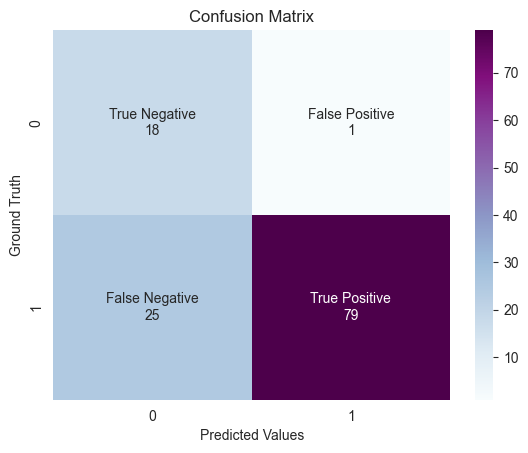

In [209]:
plot_confusion_heatmap(y_pred, y_test)

The LogisticRegression model is good because the False Positive rate is very low. This means that the rate of people that are not qualified for the loan that get approved is low. Hence, the company can minimize the risk for approving loan to the wrong people. 

### Building RandomForest model

In [210]:
rand_model = RandomForestClassifier(n_estimators=100, random_state=42) # using results from hyperparameter tuning
rand_model.fit(X_train, y_train)

y_pred = rand_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7723577235772358

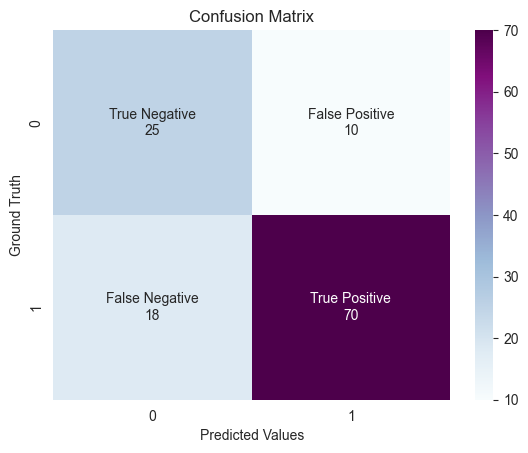

In [211]:
plot_confusion_heatmap(y_pred, y_test)

### Hyperparameter tuning with RandomForest model

In [212]:
n_estimators = [10, 100, 1000]
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2']

grid_search(rand_model, dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features))

Best: 0.773238 using {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100} 
0.743374 (0.054289), with {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.764395 (0.050125), with {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.768476 (0.046882), with {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}
0.743374 (0.054289), with {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.764395 (0.050125), with {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.768476 (0.046882), with {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.750163 (0.062740), with {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
0.773238 (0.046851), with {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
0.771211 (0.048877), with {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 1000}
0.750163 (0.062740), with {'criterion': 'entropy', 'max_featur

In [213]:
# the hyperparameter tuned results does not produce best score
rand_model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_features="sqrt", random_state=42) # using results from hyperparameter tuning
rand_model.fit(X_train, y_train)

y_pred = rand_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7317073170731707

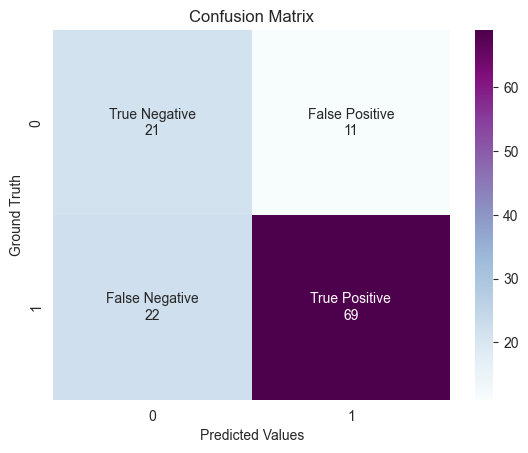

In [214]:
plot_confusion_heatmap(y_pred, y_test)

In [215]:
# hence use back default settings
rand_model = RandomForestClassifier(n_estimators=100, random_state=42) # using results from hyperparameter tuning
rand_model.fit(X_train, y_train)

y_pred = rand_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7723577235772358

### Building with XGBoost model

In [219]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7886178861788617

In [ ]:
y_pred

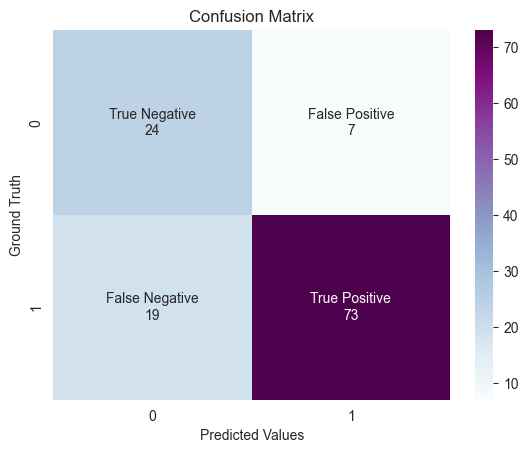

In [220]:
plot_confusion_heatmap(y_pred, y_test)

### Hyperparameter tuning with XGBoostClassifier model

In [231]:
learning_rate = [10e-3, 10e-2, 10e-1, 10e0, 10e1]
n_estimators = [10, 100, 1000]
max_depth = [3, 5, 7, 9]
min_child_weight = [1, 3, 5]
gamma = [1e-1, 2e-1, 3e-1, 4e-1]
subsample = [6e-1, 7e-1, 8e-1, 9e-1]
colsample_bytree = [6e-1, 7e-1, 8e-1, 9e-1] # not included in params
reg_alpha = [1e-5, 1e-2, 0.1, 1] # not included in params

# some hyperparameters are not included as they took too long for GridSearch
params = dict(
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample
)

grid_search(xgb_model, params)

Best: 0.814680 using {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1000, 'subsample': 0.9} 
0.806490 (0.034372), with {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.6}
0.805796 (0.037162), with {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.7}
0.805796 (0.037901), with {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.8}
0.807850 (0.035866), with {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.9}
0.807170 (0.036322), with {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}
0.807837 (0.036748), with {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
0.806476 (0.0

In [234]:
xgb_model = XGBClassifier(gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=1000, subsample=0.9)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7642276422764228

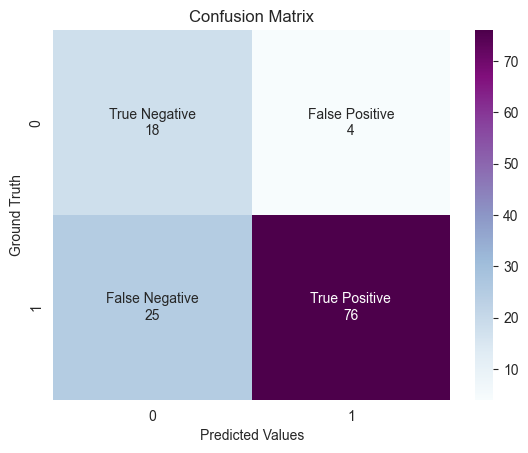

In [235]:
plot_confusion_heatmap(y_pred, y_test)

The hyperparameter tuned XGBoost model is better at predicting Positive class now but not the negative class as the False Negatvie increases. However, this is a good trade-off as approving loan should be more meticulous so that False Positive should be minimized.

### SVM Model (Hyperparameter tuning)

In [247]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy_score(y_pred, y_test)

0.7967479674796748

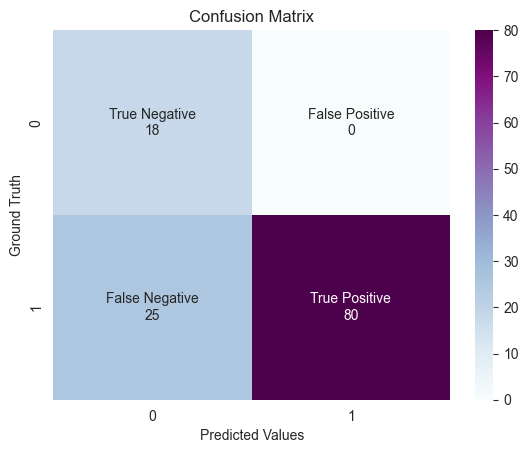

In [248]:
plot_confusion_heatmap(y_pred, y_test)

The default SVM model produces 0 False Positive which means that it correctly approves loan for all the people that qualifies for it. However, the False Negative is still the same as the other models.

### Hyperparameter tuning with SVM model

In [240]:
C = [0.1, 0.3, 0.5, 0.7, 0.9]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2, 3, 4, 5]
gamma = ['scale', 'auto']

svm_model = SVC(random_state=42)
grid_search(svm_model, dict(C=C, kernel=kernel, degree=degree, gamma=gamma))

Best: 0.814653 using {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'} 
0.814653 (0.033713), with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.812639 (0.034024), with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.810571 (0.035285), with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.801728 (0.040508), with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.814653 (0.033713), with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
0.812639 (0.034024), with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
0.810571 (0.035285), with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
0.801048 (0.040083), with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.814653 (0.033713), with {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
0.811279 (0.035057), with {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.810571 (0.035285), with {'C': 0.1, 'degree': 3, 

In [241]:
svm_model = SVC(random_state=42, C=0.1, degree=2, gamma='scale', kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy_score(y_pred, y_test)

0.7886178861788617

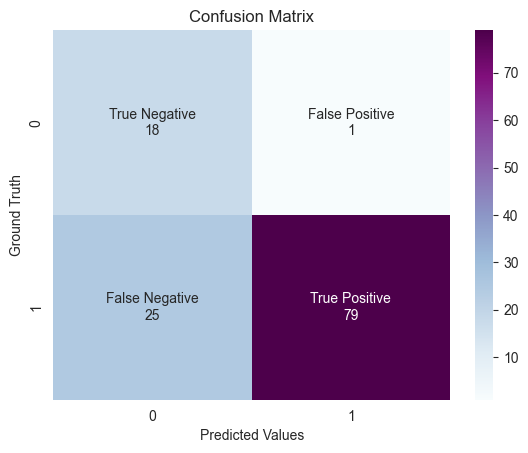

In [242]:
plot_confusion_heatmap(y_pred, y_test)

As seen as the text printed above after hyperparameter tuning, the SVM model's performance becomes worse than the default settings. Hence, the default settings are implemented for SVM model.

### Ensemble Techniques - Combine multiple models

In [249]:
# predictions by each model
y_pred_lg = lg_model.predict(X_test)
y_pred_rand = rand_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

In [251]:
y_pred_lg.shape

(123,)

In [254]:
y_pred_rand.shape

(123,)

In [253]:
y_pred_xgb.shape

(123,)

In [252]:
y_pred_svm.shape

(123,)

In [258]:
final_pred = []

for index, prediction in enumerate(y_pred_lg):
    predictions = []
    
    print("LG Prediction:", y_pred_lg[index])
    print("RandomForest Prediction:", y_pred_rand[index])
    print("XGB Prediction:", y_pred_xgb[index])
    print("SVM Prediction:", y_pred_svm[index])
    print("===========================================================\n")
    
    predictions.append(y_pred_lg[index])
    predictions.append(y_pred_rand[index])
    predictions.append(y_pred_xgb[index])
    predictions.append(y_pred_svm[index])
    
    voted_prediction = max(predictions, key=predictions.count)
    final_pred.append(voted_prediction)
    
final_pred = np.array(final_pred)

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 0
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 0
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 0
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 0
RandomForest Prediction: 0
XGB Prediction: 0
SVM Prediction: 0

LG Prediction: 1
RandomForest Prediction: 1
XGB Prediction: 1
SVM Prediction: 1

LG Prediction: 1
RandomFores

In [260]:
final_pred.shape

(123,)

In [262]:
accuracy_score(final_pred, y_test)

0.7886178861788617

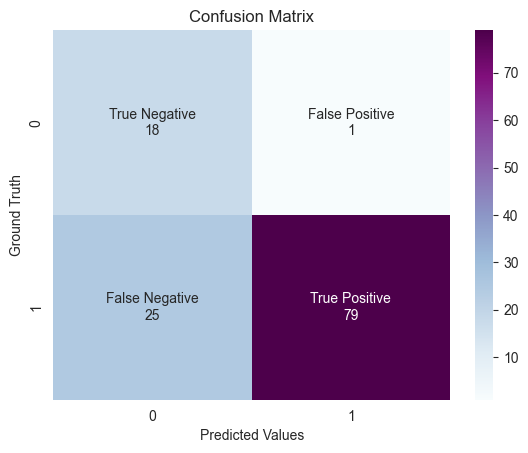

In [263]:
plot_confusion_heatmap(final_pred, y_test)

### Results of Ensemble Techniques

The accuracy of the ensembled model does not improve based on the previous models built.

### Conclusion

1. Standardization of data using `sklearn.preprocessing.scale` method significantly increases the performance of the model but not necessarily the accuracy.
2. When doing EDA, can separate variable into types of variables first, then do EDA based on the types of variables
3. Facet grid (subplot) are advised to use for comparison between charts of the same type of variables.

### Recommendations

The False Positive of the model can be improved to avoid more people that are qualified for the loan misses the chance to get the loan. This can be achieved using:
1. Resampling method through undersampling or oversampling with SMOTE.
2. Get more real data to balance the imbalanced classes.